# Gráficos de Resíduos

Os resíduos, no contexto dos modelos de regressão, são a diferença entre 
o valor observado da variável-alvo (y) e o valor previsto (ŷ), 
por exemplo, o erro da previsão.

O gráfico de resíduos mostra a diferença 
entre os resíduos no eixo vertical e a variável dependente no eixo horizontal 
eixo horizontal, permitindo detectar regiões dentro do alvo que podem ser suscetíveis a mais ou menos 
ser suscetíveis a mais ou menos erros.

## Exemplo 1:

In [2]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

In [6]:
# Dataset de exemplo com y - x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

<Axes: >

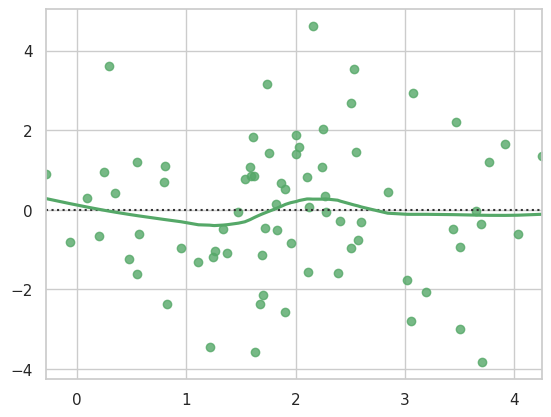

In [8]:
# Traçar os resíduos após o ajuste de um modelo linear
sns.residplot(x=x,
              y=y,
              lowess=True, color="g")

## Exemplo 2:

In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [13]:
from sklearn.datasets import fetch_california_housing # as load_boston
boston = fetch_california_housing() #load_boston()

bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
bos.columns = boston.feature_names
bos.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
bos['PRICE'] = boston.target

In [17]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
lm = LinearRegression()
lm

LinearRegression()

In [20]:
bos.MedInc # Usando esse valor como se fosse o RM

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

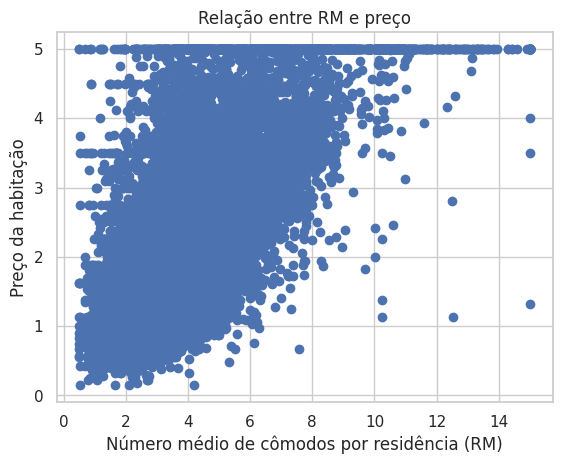

In [21]:
plt.scatter(bos.MedInc, bos.PRICE)
plt.xlabel("Número médio de cômodos por residência (RM)") # Não é o RM, na realidade
plt.ylabel("Preço da habitação")
plt.title("Relação entre RM e preço")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
X, bos.PRICE, test_size=0.33,random_state = 5)

In [24]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Text(0, 0.5, 'Resíduos')

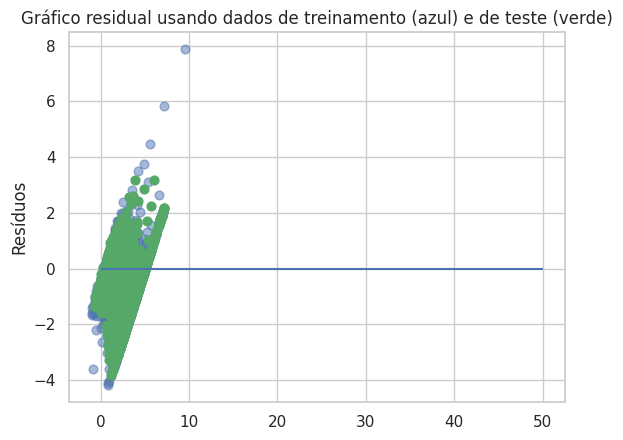

In [26]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin= 0, xmax= 50)
plt.title('Gráfico residual usando dados de treinamento (azul) e de teste (verde)')
plt.ylabel('Resíduos')